In [ ]:
# SIMULATION

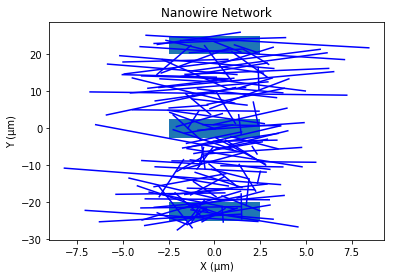

In [1]:
from network import *

NETWORK = create_network(params={
    'width':5, 'height':50,
    'inputs':2, 'outputs':1,
    'e_width':5, 'e_height':5,
    'density':.5,
    'lalpha':6, 'lloc':0, 'lbeta':1,
    'seed':1
})


plot_network(NETWORK)

def voltage_func(time, index):
    voltages = [0,0,0]
    if time < 2:
        voltages = [0,1,1]
    elif time < 4:
        voltages = [0,0,1]
    elif time < 6:
        voltages = [1,0,1]
    else:
        voltages = [0,0,1]
    return voltages[index]
   
data = simulate(params={
    'network':NETWORK,
    'ron':5e3, 'ron_sigma':0, 'roff':5e6, 'roff_sigma':0,
    'mwidth':5e-9, 'mw_sigma':0, 'initial_width':0, 'mobility':0.5e-12,
    'noise_sigma':0.1,
    'dissolution_time':.1,
    'voltage_function':voltage_func,
    'max_current':.00001,#.0000003,#.00006,
    'max_current_accuracy':0.05,
    'timestep':0.01, 'total_time':8,
    'seed':0
})

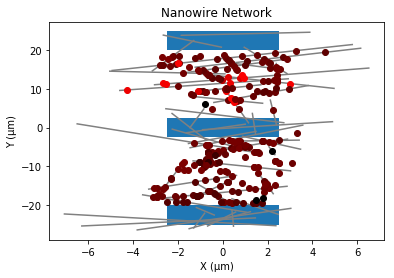

In [2]:
def plot_network_2(network, currents):
    """Plot a network."""
    for nanowire in network['nanowires'][0:50]:
        color = 'blue' if nanowire['connected'] else 'red'
        plt.plot([nanowire['start'][0], nanowire['end'][0]],
                 [nanowire['start'][1], nanowire['end'][1]], color='gray')
    maxcurrent = np.max(np.abs(currents))
    for i, junction in enumerate(network['junctions']):
        current = abs(currents[i])/maxcurrent
        color = (current, 0, 0) if junction['connected'] else (0,0,1)
        plt.plot([junction['position'][0]], [junction['position'][1]], 'o', color=color)
    for electrode in network['electrodes']:
        plt.gca().add_patch(patches.Rectangle((electrode['x'], electrode['y']),
                                              electrode['w'], electrode['h']))
    plt.xlabel("X (µm)"); plt.ylabel("Y (µm)"); plt.title('Nanowire Network'); plt.show()

plot_network_2(NETWORK, np.power(np.abs(data['currents'])[-1], .1))

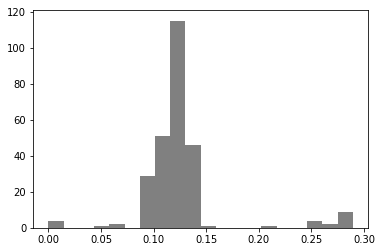

In [3]:
histogram = np.histogram(np.power(np.abs(data['currents'])[-1], .1), bins=20)
plt.bar(histogram[1][:-1], histogram[0], width=(histogram[1][1]-histogram[1][0]), align='edge', color='gray', label='Data'); plt.show()

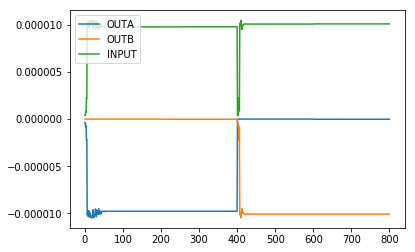

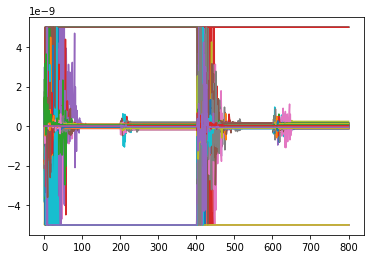

In [4]:
import matplotlib.pyplot as plt

plt.plot(np.array(data['tcurrents'])[:,0], label='OUTA')
plt.plot(np.array(data['tcurrents'])[:,1], label='OUTB')
plt.plot(np.array(data['tcurrents'])[:,2], label='INPUT')
plt.legend(); plt.show()

plt.plot(data['widths']); plt.show()